In [1]:
from sklearn.datasets import load_iris
import pandas as pandas

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

features = iris['data'][:, 2:]
labels = iris['target']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=13)

In [4]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [5]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13], dtype=int64))

### stratify

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, 
                                                    random_state=13, 
                                                    stratify=labels)

In [7]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [8]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [9]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

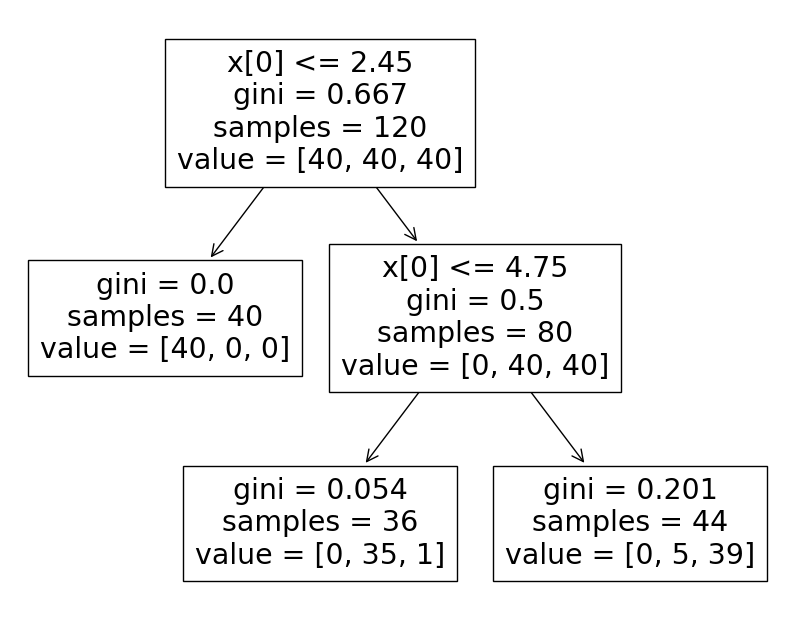

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(iris_tree)
plt.show()

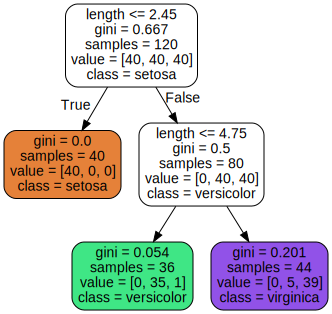

In [14]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(iris_tree, feature_names=['length', 'width'],
                       class_names=iris['target_names'],
                       rounded=True, filled=True
                       ))

<Axes: >

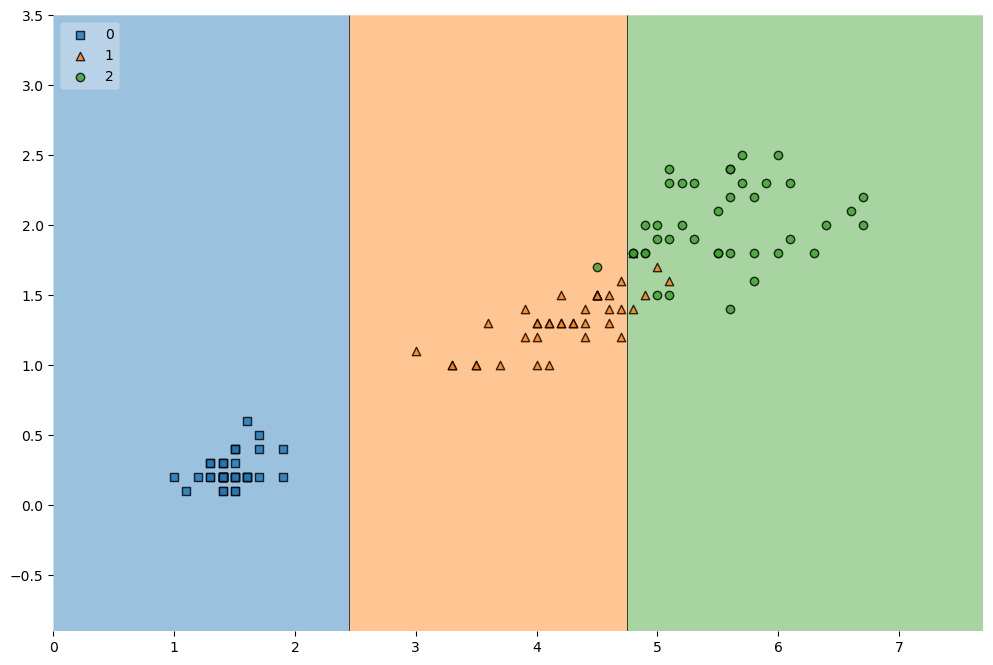

In [15]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)

In [16]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

<Axes: >

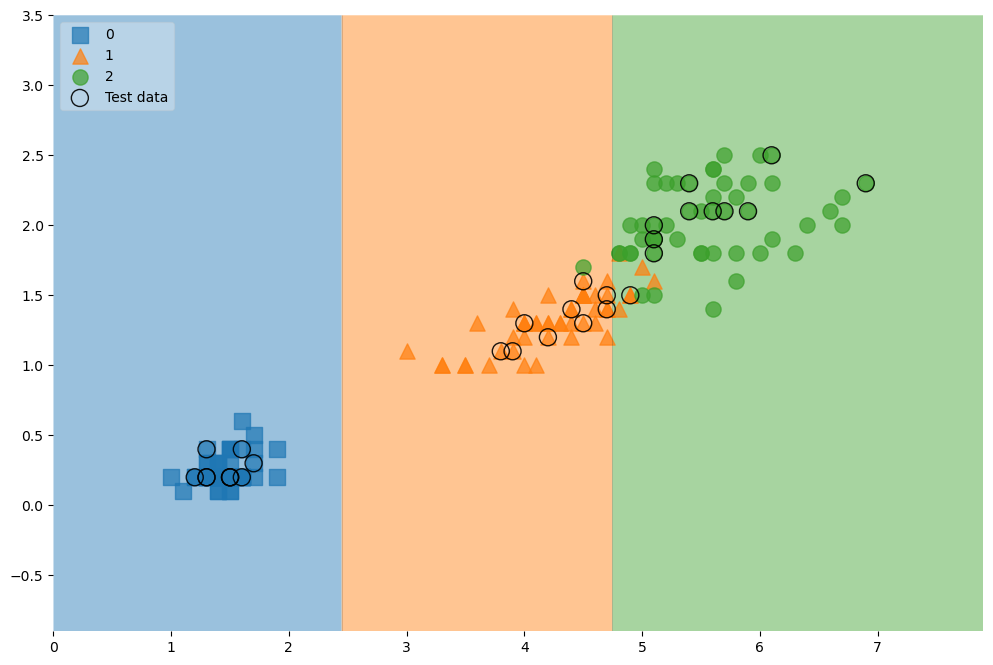

In [17]:
scatter_highlight_kwargs = {'s': 150, 'label': 'Test data', 'alpha': 0.9}
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}

plt.figure(figsize=(12, 8))
plot_decision_regions(X=features, y=labels,
                      X_highlight=X_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contour_kwargs={'alpha': 0.2}
                      )

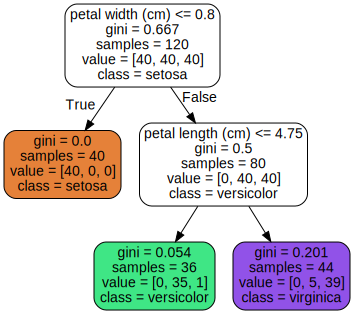

In [18]:
features = iris['data']
labels = iris['target']

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

Source(export_graphviz(iris_tree, feature_names=iris['feature_names'],
                       class_names=iris['target_names'],
                       rounded=True, filled=True
                       ))

In [19]:
test_data = [[4.3, 2., 1.2, 1.]]
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [22]:
iris['target_names'][iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [23]:
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [24]:
dict(zip(iris['feature_names'], iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}